In [ ]:
from __future__ import absolute_import, division, print_function

# First exploration

## Imports

In [59]:
import json
import datetime

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline



## Read data

In [4]:
df_21 = pd.read_csv('ebay_20170121.csv')
df_22 = pd.read_csv('ebay_20170122.csv')
df_23 = pd.read_csv('ebay_20170123.csv')

In [6]:
df_21.head()

,Unnamed: 0,EndTimeFrom,EndTimeTo,CategoryID,items_sold,items_not_sold,items_listed
0,0,2017-01-21 00:00:00,2017-01-21 01:00:00,1305,22,53,24
1,1,2017-01-21 00:00:00,2017-01-21 01:00:00,625,332,840,260
2,2,2017-01-21 00:00:00,2017-01-21 01:00:00,888,1875,8238,1513
3,3,2017-01-21 00:00:00,2017-01-21 01:00:00,550,222,1365,74
4,4,2017-01-21 00:00:00,2017-01-21 01:00:00,58058,1125,5678,833


In [7]:
df_22.head()

,Unnamed: 0,EndTimeFrom,EndTimeTo,CategoryID,items_sold,items_not_sold,items_listed
0,0,2017-01-22 00:00:00,2017-01-22 01:00:00,1305,15,55,22
1,1,2017-01-22 00:00:00,2017-01-22 01:00:00,625,380,908,166
2,2,2017-01-22 00:00:00,2017-01-22 01:00:00,888,2292,12009,1260
3,3,2017-01-22 00:00:00,2017-01-22 01:00:00,550,375,1490,89
4,4,2017-01-22 00:00:00,2017-01-22 01:00:00,58058,1111,9314,572


In [8]:
df_23.head()

,Unnamed: 0,EndTimeFrom,EndTimeTo,CategoryID,items_sold,items_not_sold,items_listed
0,0,2017-01-23 00:00:00,2017-01-23 01:00:00,1305,11,120,18
1,1,2017-01-23 00:00:00,2017-01-23 01:00:00,625,565,1218,167
2,2,2017-01-23 00:00:00,2017-01-23 01:00:00,888,3664,11291,763
3,3,2017-01-23 00:00:00,2017-01-23 01:00:00,550,284,2309,53
4,4,2017-01-23 00:00:00,2017-01-23 01:00:00,58058,1321,3823,550


In [14]:
df_23.shape

(819, 7)

## Concatenate data frames

In [9]:
df = pd.concat([df_21, df_22, df_23], ignore_index=True)

In [12]:
df.shape

(2451, 7)

In [15]:
# Remove column that used to be the original index before writing to disk
del df['Unnamed: 0']

In [16]:
df.shape

(2451, 6)

In [17]:
df.head()

,EndTimeFrom,EndTimeTo,CategoryID,items_sold,items_not_sold,items_listed
0,2017-01-21 00:00:00,2017-01-21 01:00:00,1305,22,53,24
1,2017-01-21 00:00:00,2017-01-21 01:00:00,625,332,840,260
2,2017-01-21 00:00:00,2017-01-21 01:00:00,888,1875,8238,1513
3,2017-01-21 00:00:00,2017-01-21 01:00:00,550,222,1365,74
4,2017-01-21 00:00:00,2017-01-21 01:00:00,58058,1125,5678,833


## Convert datetime column format

In [29]:
df[['EndTimeFrom','EndTimeTo']] = df[['EndTimeFrom','EndTimeTo']].apply(pd.to_datetime)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 6 columns):
EndTimeFrom       2451 non-null datetime64[ns]
EndTimeTo         2451 non-null datetime64[ns]
CategoryID        2451 non-null int64
items_sold        2451 non-null int64
items_not_sold    2451 non-null int64
items_listed      2451 non-null int64
dtypes: datetime64[ns](2), int64(4)
memory usage: 115.0 KB


## Prepare for plotting

In [22]:
categories = df['CategoryID'].unique().tolist()

In [24]:
print(len(categories), ' : ', categories)

(34, ' : ', [1305, 625, 888, 550, 58058, 172008, 237, 1, 11116, 3252, 870, 2984, 26395, 281, 64482, 220, 11700, 45100, 619, 20081, 316, 99, 260, 267, 10542, 11232, 11233, 14339, 1281, 15032, 12576, 1249, 11450, 293])


In [31]:
end_time = df['EndTimeTo'].tolist()
items_sold = df['items_sold'].tolist()
items_not_sold = df['items_not_sold'].tolist()

1

## Plot simple timeseries

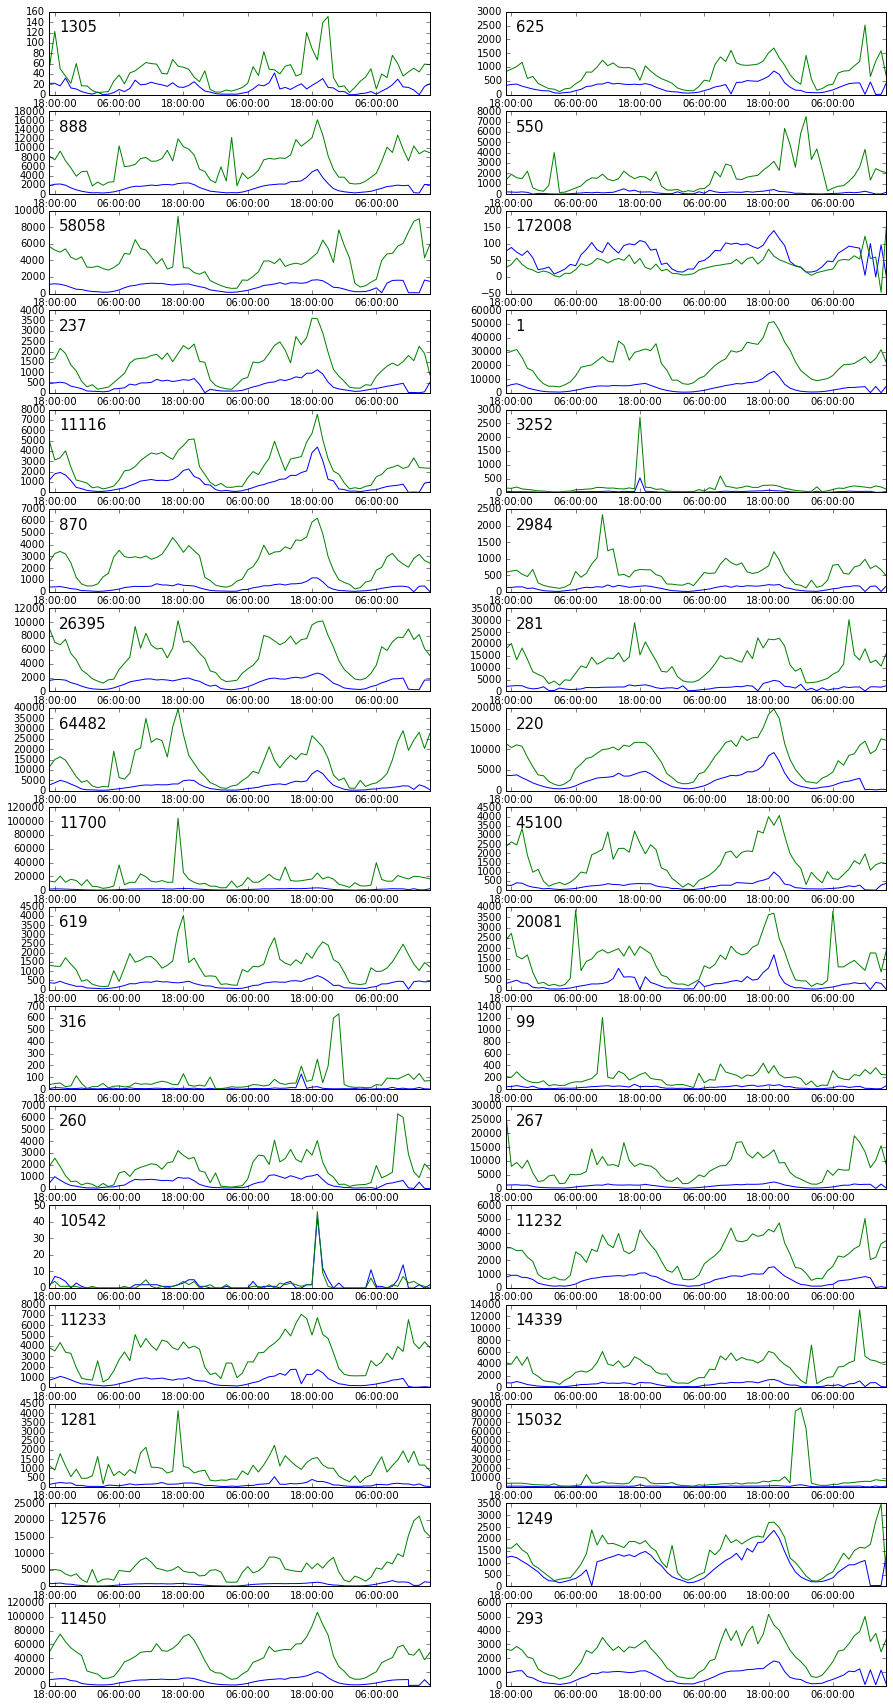

In [61]:
fig, ax = plt.subplots(len(categories)/2,2,figsize=(15, 30))
for idx,category in enumerate(categories):
    end_time = df['EndTimeTo'][df['CategoryID'] == category].tolist()
    end_time = [x - datetime.timedelta(hours=8.0) for x in end_time]
    items_sold = df['items_sold'][df['CategoryID'] == category].tolist()
    items_not_sold = df['items_not_sold'][df['CategoryID'] == category].tolist()
    if idx%2 == 0:
        idx = idx/2
        ax[idx][0].plot(end_time,items_sold)
        ax[idx][0].plot(end_time,items_not_sold)
        ax[idx][0].annotate(category,
                            xy=(.025, .9), xycoords='axes fraction',
                            horizontalalignment='left', verticalalignment='top',
                            fontsize=15)
    else:
        idx = idx/2
        ax[idx][1].plot(end_time,items_sold)
        ax[idx][1].plot(end_time,items_not_sold)
        ax[idx][1].annotate(category,
                            xy=(.025, .9), xycoords='axes fraction',
                            horizontalalignment='left', verticalalignment='top',
                            fontsize=15)


## Plot simple timeseries with data on different axes

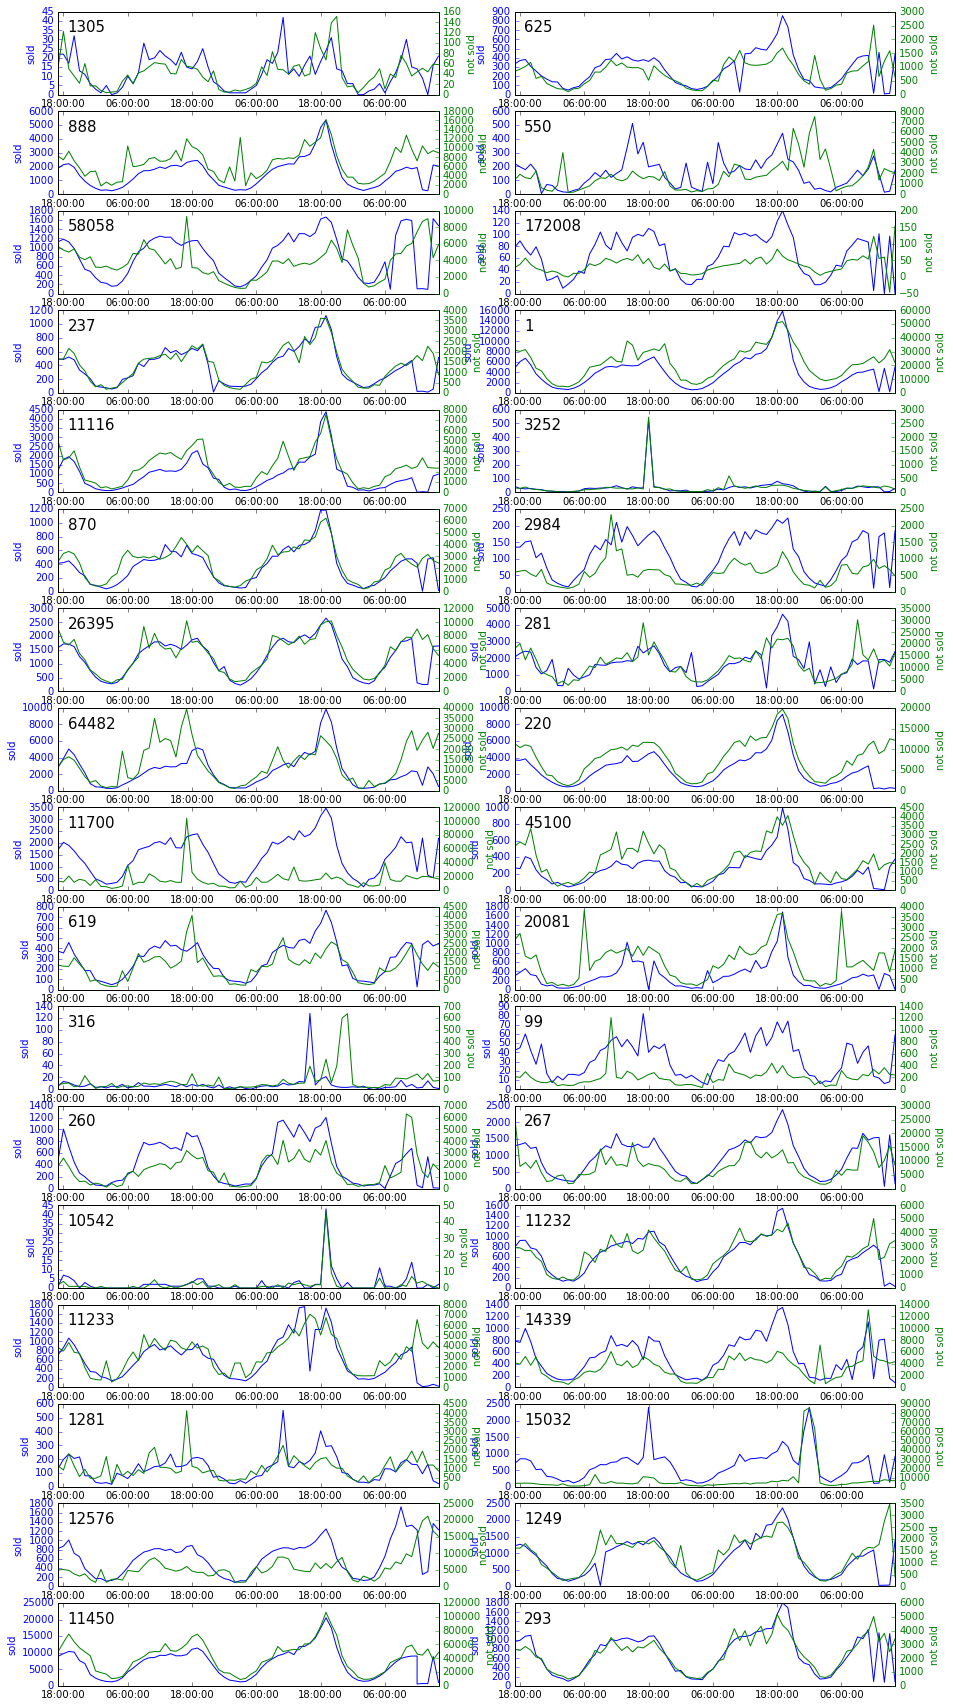

In [62]:
fig, ax = plt.subplots(len(categories)/2,2,figsize=(15, 30))
for idx,category in enumerate(categories):
    end_time = df['EndTimeTo'][df['CategoryID'] == category].tolist()
    end_time = [x - datetime.timedelta(hours=8.0) for x in end_time]
    items_sold = df['items_sold'][df['CategoryID'] == category].tolist()
    items_not_sold = df['items_not_sold'][df['CategoryID'] == category].tolist()
    if idx%2 == 0:
        idx1 = idx/2
        idx2 = 0
    else:
        idx1 = idx/2
        idx2 = 1
    ax[idx1][idx2].plot(end_time,items_sold)
    ax[idx1][idx2].set_ylabel('sold', color='b')
    ax[idx1][idx2].tick_params('y', colors='b')
    ax2 = ax[idx1][idx2].twinx()
    ax2.plot(end_time,items_not_sold, 'g-')
    ax2.set_ylabel('not sold', color='g')
    ax2.tick_params('y', colors='g')
    ax[idx1][idx2].annotate(category,
                        xy=(.025, .9), xycoords='axes fraction',
                        horizontalalignment='left', verticalalignment='top',
                        fontsize=15)


## Plot simple timeseries with data ratio

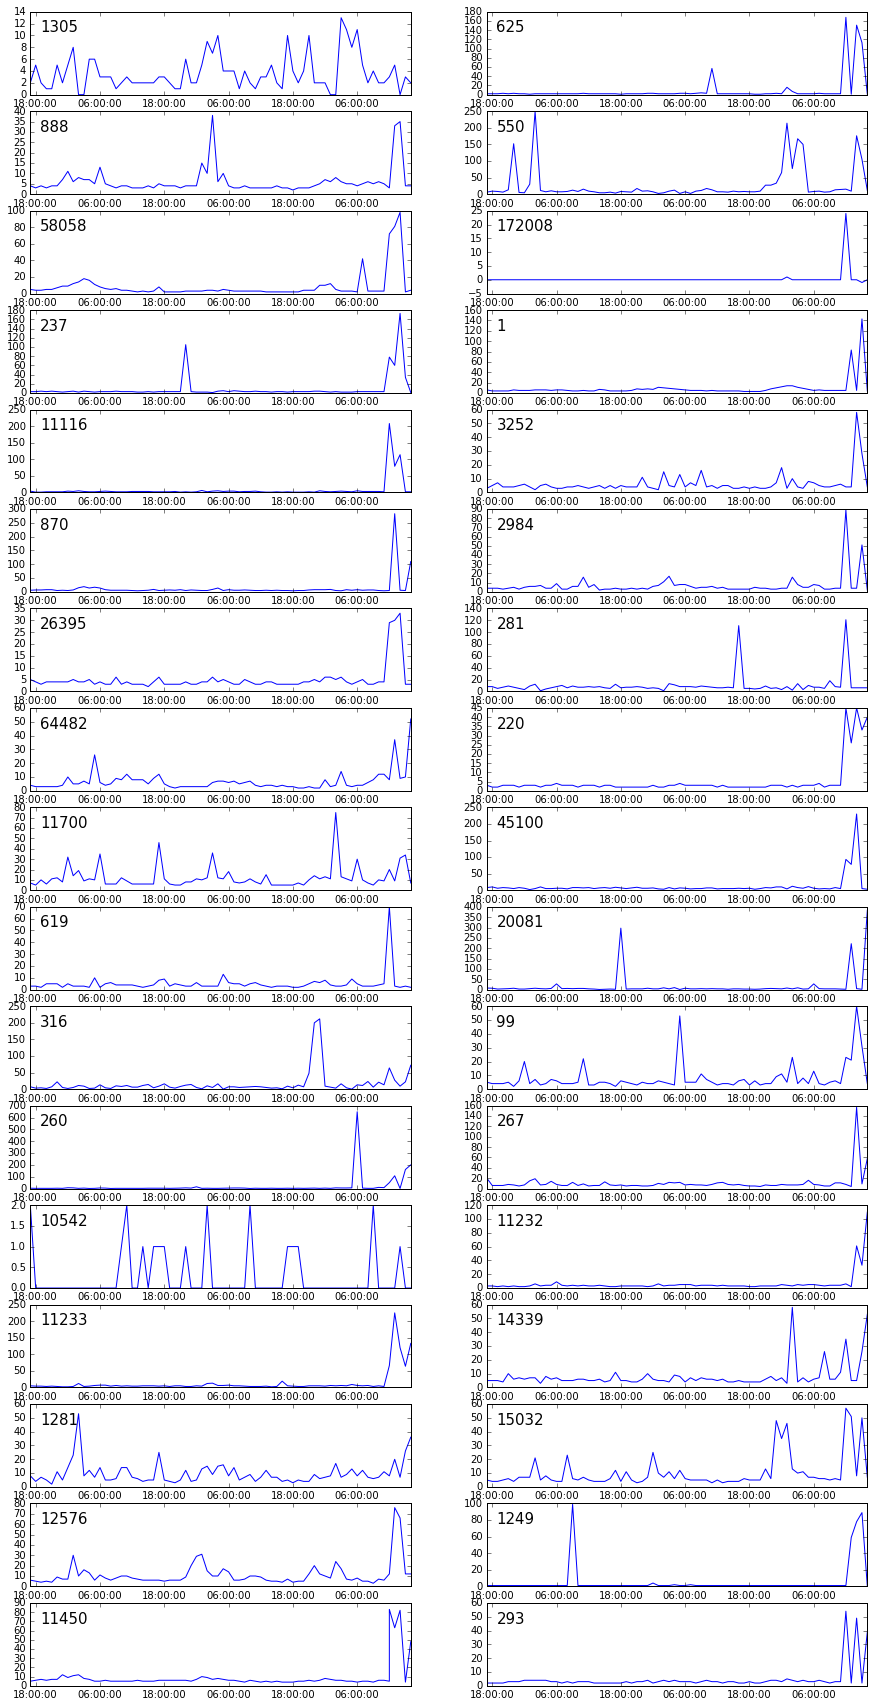

In [63]:
fig, ax = plt.subplots(len(categories)/2,2,figsize=(15, 30))
for idx,category in enumerate(categories):
    end_time = df['EndTimeTo'][df['CategoryID'] == category].tolist()
    end_time = [x - datetime.timedelta(hours=8.0) for x in end_time]
    items_sold = df['items_sold'][df['CategoryID'] == category].tolist()
    items_not_sold = df['items_not_sold'][df['CategoryID'] == category].tolist()
    items_ratio = [j/i for i,j in zip(items_sold,items_not_sold)]
    if idx%2 == 0:
        idx = idx/2
        ax[idx][0].plot(end_time,items_ratio)
        ax[idx][0].annotate(category,
                            xy=(.025, .9), xycoords='axes fraction',
                            horizontalalignment='left', verticalalignment='top',
                            fontsize=15)
    else:
        idx = idx/2
        ax[idx][1].plot(end_time,items_ratio)
        ax[idx][1].annotate(category,
                            xy=(.025, .9), xycoords='axes fraction',
                            horizontalalignment='left', verticalalignment='top',
                            fontsize=15)




## Plot simple timeseries all data in one plot

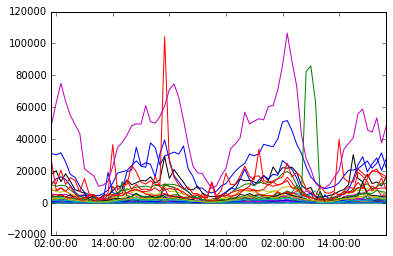

In [64]:
for category in categories:
    end_time = df['EndTimeTo'][df['CategoryID'] == category].tolist()
    items_not_sold = df['items_not_sold'][df['CategoryID'] == category].tolist()
    plt.plot(end_time,items_not_sold)